# Chap 3. NumPy와 Matplotlib




##3.1 NumPy
 * Numpy 공식 웹사이트: http://www.numpy.org/
 * Numpy 개발자 참조 문서: http:/docs.scipy.org/doc/numpy/genindex.html

### 3.1.1 이미지와 NumPy
지금까지 계속 써왔던 이미지나 동영상을 읽어들이는 함수 cv2.imread()는 Numpy 배열을 반환한다. 즉 Numpy에 대해 잘 알지 못하면 파이썬 언어로 OpenCV를 사용하는게 힘들어진다는 뜻이다.
Numpy 배열에서 정보를 얻는 기본 속성은 다음과 같다.
* ndim : 차원(축)의 수
* shape : 각 차원의 크기(튜플)
* size : 전체 요소의 개수, shape의 각 항목의 곱
* dtype : 요소의 데이터 타입
* itemsize : 각 요소의 바이트 크기

다음 코드는 파이썬 대화형 콘솔에서 OpenCV로 읽어들인 500 x 500 픽셀 이미지 정보를 담은 NumPy 배열의 속성 정보를 출력한다. 

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/파이썬을 이용한 open CV/Data_Folder/Save_picture.jpg")
type(img)

numpy.ndarray

ndarray는 **N-Dimensional Array**의 약자로 N차원 배열, 즉 다차원 배열을 의미한다. 
OpenCV는 기본적으로 이미지를 3차원 배열, 즉 '행 X 열 X 채널'로 표현한다. 행과 열은 이미지의 크기인 높이와 폭만큼의 길이를 갖고 채널은 컬러인 경우 파랑, 초록, 빨강 3개의 길이를 갖는다. 따라서 일반적인 이미지를 읽었을 때 3차원 배열은 '**높이 X 폭 X 3(Colors)**'의 형태이다.

In [ ]:
print(img.ndim)
print(img.shape)
print(img.size)       #전체 요소의 개수(각 차원의 길이의 곱)

3
(240, 320, 3)
230400


파이썬 언어는 데이터 타입이나 데이터 크기를 따로 지정하지 않지만, 수많은 데이터를 처리하는 NumPy 배열은 데이터 타입을 명시하는 것이 효과적일 수밖에 없다. 이미지 픽셀 데이터는 음수나 소수점을 갖는 경우가 없고 값의 크기도 최대 255 이므로 부호 없는 8비트이다. 따라서 데이터 타입으로 **uint8**를 사용한다. 

In [ ]:
print(img.dtype)        #usigned int형 8bits
print(img.itemsize)     #byte로 반환

uint8
1


### 3.1.2 NumPy 배열 생성
Numpy 배열을 만드는 방법은 값을 가지고 생성하는 방법과, 크기만 지정해서 생성하는 방법으로 나눠진다. 크기만 지정해서 생성하는 방법은 다시 특정한 초기 값을 모든 요소에 지정하는 경우와 값의 범위를 지정해서 순차적으로 증가 또는 감소하는 값을 갖게 하는 방법으로 나눌 수 있다.  

다음 목록은 NumPy 배열 생성에 사용할 함수들이다.
* 값으로 생성 : array()
* 초기 값으로 생성 : empty(), zeros(), ones(), full()
* 기존 배열로 생성 : empty_like(), zeros_like(), ones_like(), full_like()
* 순차적인 값으로 생성 : arange()
* 난수로 생성 : random.rand(), random.randn()


### 3.1.3 값으로 생성
배열 생성할 때 사용할 값을 가지고 있는 경우에는 numpy.array() 함수로 간단히 생성할 수 있다. 
* list : 배열 생성에 사용할 값을 갖는 파이썬 리스트 객체
* dtype : 데이터 타입(생략하면 값에 의해 자동 결정)
  - int8, int16, int32, int64 : 부호 있는 정수
  - uint8, uint16, uint32, uint64 : 부호 없는 정수
  - float16, float32, float64, float128 : 부동 소수점을 갖는 실수
  - complex64, complex128, complex256 : 부동 소수점을 갖는 복소수
  - bool : 불(boolean)


이제 numpy.array() 함수로 파이썬 리스트에 값을 지정해서 생성하는 코드를 작성해본다.

In [ ]:
import numpy as np
a = np.array([1,2,3,4])
print(a)
print(a.dtype)
print(a.shape)

[1 2 3 4]
int64
(4,)


In [ ]:
b = np.array([[1,2,3,4], [5,6,7,8]])
print(b)
print(b.shape)
print('==================')
c = np.array([1,2,3.14,4])
print(c)
print(c.dtype)
print('==================')
d = np.array([1,2,3,4], dtype=np.float32)
print(d, d.dtype)

[[1 2 3 4]
 [5 6 7 8]]
(2, 4)
[1.   2.   3.14 4.  ]
float64
[1. 2. 3. 4.] float32


### 3.1.4 크기와 초기 값으로 생성
OpenCV에서는 대부분 배열 생성에 사용할 값을 가지고 있지 않다. 이미지 작업을 할 때 픽셀 값을 타이핑해서 입력한다는 것은 거의 있을 수 없다. 따라서 NumPy 배열을 생성할 때 더 많이 사용하는 방법은 배열의 차수와 크기 그리고 초기 값을 지정해서 생성하는 방법이다. 이때 쓸 수 있는 함수는 초기 값을 지정하는 방법에 따라 여러 가지가 있는데, 튜플로 차수와 크기를 지정하는 방법은 모두 같다.
* numpy.empty(shape [, dtype]) : 초기화되지 않은 값(쓰레기 값)으로 배열 생성
 - shape : 튜플, 배열의 각 차수의 크기 지정
* numpy.zeros(shape [, dtype]) : 0(영, zero)으로 초기화된 배열 생성
* numpy.ones(shape [, dtype]) : 1로 초기화된 배열 생성
* numpy.full(shape, fill_value [,dtype]) : fill_value로 초기화 된 배열 생성 

먼저 numpy.empty() 함수의 사용 사례를 보자.

In [ ]:
a = np.empty((2,3))
print(a,'\n', a.dtype)

[[2.13420786e-316 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]] 
 float64


위의 초기 값은 쓰레기 값으로 제각각인 것을 알 수 있다. 특정 값으로 초기화를 하고 싶으면 fill() 함수를 사용하면 된다.

In [ ]:
a.fill(255)
print(a)

[[255. 255. 255.]
 [255. 255. 255.]]


이런 식으로 배열을 만들고 어떤 특정한 값으로 모든 요소를 초기화하는 일이 많은데, 이런 작업을 한번에 해주는 함수가 zeros(), ones(), full()이다. 다음으로 활용 예제들을 보자.


In [ ]:
b = np.zeros((2, 3), dtype=np.int8)
print(b, b.dtype)
print("=============")
c=np.ones((2,3), dtype=np.int16)
print(c)
print("=============")
d = np.full((2,3,4), 255, dtype=np.uint8)
print(d, d.dtype)

[[0 0 0]
 [0 0 0]] int8
[[1 1 1]
 [1 1 1]]
[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]] uint8


새로운 배열을 생성할 때 기존에 있던 배열과 같은 크기의 배열을 만들어야 할 때도 있는데, 그때 사용하는 함수는 다음과 같다.
* empty_like(array, [, dtype]) : 초기화되지 않은, array와 같은 shape와 dtype의 배열 생성 
* zeros_like(array, [, dtype]) : 0으로 초기화 된, array와 같은 shape와 dtype의 배열 생성
* ones_like(array, [, dtype]) : 1로 초기화 된, array와 같은 shape와 dtype의 배열 생성
* full_like(array, fill_value [, dtype]) : fill_value로 초기화 된, array와 같은 shape와 type 생성

주로 이미지를 읽고, 필요한 연산을 한 후에 결과 이미지를 생성할 때 원본 이미지와 동일한 크기의 배열을 생성해야 하므로 이런 함수들을 자주 쓴다.

In [ ]:
img = cv2.imread('/content/drive/MyDrive/파이썬을 이용한 open CV/Data_Folder/blank_500.jpg')
print(img, img.dtype, '\n', img.shape)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]] uint8 
 (500, 500, 3)


위 코드는 2장에서 만든 blank 이미지를 배열로 읽어들였다. 이 이미지와 동일한 크기의 배열을 생성하는 코드를 작성하면 다음과 같다.

In [ ]:
a = np.empty_like(img)
b = np.zeros_like(img)
c = np.ones_like(img)
d = np.full_like(img, 255)
print(a, a.dtype, a.shape)
print("======================")
print(b, b.dtype, b.shape)
print("======================")
print(c, c.dtype, c.shape)
print("======================")
print(d, d.dtype, d.shape)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] uint8 (500, 500, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]] uint8 (500, 500, 3)
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1

### 3.1.5 시퀀스와 난수로 생성
NumPy 배열을 생성하는 방법 중에는 일정한 범위 내에서 순차적인 값을 갖게 하는 방법과 난수로 채우는 방법이 있다.
* numpy.arrage([start=0, ] stop [, step=1, dtype=float64]) : 순차적인 값으로 생성
  - start : 시작 값
  - stop : 종료 값, 범위에 포함하는 수는 stop -1까지
  - step : 증가 값
* numpy.random.read([d0 [, d1 [..., dn]]]) : 0과 1사이의 무작위 수로 생성
  - d0, d1..dn : shape, 생략하면 난수 한 개 반환
* numpy.random.randn([d0 [, d1 [..., dn]]]) : 표준정규 분포(평균 :0, 분산 : 1)를 따르는 무작위 수로 생성

numpy.arrange() 함수는 파이썬 기본 함수인 range()와 사용 방법이 거의 같다. 다만 리스트가 아닌 NumPy 배열을 반환한다는 차이가 있다. 


In [ ]:
a = np.arange(5)                  #0부터 4까지 1씩 증가하는 수를 갖는 배열 생성
print(a, a.dtype, a.shape)
print("======================")
a = np.arange(3, 9, 2)            #3부터 8까지 2씩 증가하는 수를 갖는 배열 생성 
print(a)

[0 1 2 3 4] int64 (5,)
[3 5 7]


arange() 함수는 1차원 배열만을 생성할 수 있으므로 다차원 배열, 특히 이미지 데이터를 갖는 3차원 배열로 만들기 위해서 '차원 변경'함수와 함께 써야 하는 경우가 많다. 이는 다음 절에서 설명한다.  
난수를 발생시키는 함수로는 random.rand()와 random.randn()이 있다. rand() 함수는 0과 1사이의 값을 무작위로 만들고, randn() 함수는 평균이 0이고, 분산이 1인 정규 분포를 따르는 무작위 수를 만들어 낸다. 

In [ ]:
a = np.random.rand()
print(a)
b = np.random.randn()
print(b)
a = np.random.rand(2,3)
print(a)
b = np.random.randn(2,3)
print(b)


0.7208692043888941
-0.49052921785341697
[[0.90707129 0.85779154 0.44166771]
 [0.15735894 0.0773554  0.82679602]]
[[-0.70084368 -1.31968586  0.55477718]
 [-0.81155907 -2.18209558 -0.87817379]]


이 함수들은 결과 값이 소수점을 갖는 데다가 특정 범위 내에서 난수를 추출하므로 이미지 작업에 필요한 원하는 범위 내에서 난수를 발생하기 위해서는 뒤에서 설명하는 브로드캐스팅 연산과 dtype 변경이 필요할 때가 많다. 

### 3.1.6 dtype 변경

배열의 데이터 타입을 변경하는 함수는 다음과 같다.
* ndarray.astype(dtype)
  - dtype : 변경하고 싶은 dtype, 문자열 또는 dtype
* numpy.uintXX(array) : array를 부호 없는 정수(uint) 타입으로 변경해서 반환
  - uintXX : uint8, uint16, uint32, uint64
* numpy.intXX(array) : array를 int 타입으로 변경해서 반환
  - intXX : int8, int16, int32, int64
* numpy.floatXX(array) : array를 float 타입으로 변경해서 반환
  - floatXX : float16, float32, float 64, float128
* numpy.comlexXX(array) : array를 복소수 타입으로 변경해서 반환
  - complexXX : complex64, complex128, complex256


In [ ]:
a = np.arange(5)
print(a, a.dtype)
b = a.astype('float32')
print(b, b.dtype)
c = a.astype(np.float64)          #NumPy 모듈에 선언된 변수를 이용
print(c, c.dtype)

[0 1 2 3 4] int64
[0. 1. 2. 3. 4.] float32
[0. 1. 2. 3. 4.] float64


위 처럼 astype() 함수를 사용하여 dtype을 변경하는 방법이 있고, 다른 방법으로 NumPy에서 지원하는 dtype들과 같은 이름의 함수들이 있는데, 변경을 원하는 dtype 이름의 함수를 호출하면서 배열 객체를 인자로 전달하는 방법도 있다.

In [ ]:
print(a.dtype)
d = np.uint8(a)
print(d, d.dtype)

int64
[0 1 2 3 4] uint8


### 3.1.7 차원 변경
원래 1차원이던 배열을 2행 3열, 아니면 100 X 200 X 3과 같은 배열을 1차원으로 바꾸는 식의 작업이 필요할 때가 많다. 이때 필요한 함수는 다음과 같다.
* ndarray.reshape(newshape) : ndarray의 shape를 newshape로 차원 변경
* numpy.reshape(ndarray, newshape) : ndarray의 shape를 newshape로 차원 변경
  - ndarray : 원본 배열 객체
  - newshape : 변경하고자 하는 새로운 shape(튜플)
* nempy.ravel(ndarray) : 1차원 배열로 차원 변경
  - ndarray : 변경할 원본 배열
* ndarray.T : 전치배열(transpose)


In [ ]:
a = np.arange(6)
print(a)
b = a.reshape(2, 3)
print(b)
c = np.reshape(a, (2,3))
print(c)

[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]
[[0 1 2]
 [3 4 5]]


이 두 함수는 새로운 shape을 지정할 때 -1을 포함해서 전달할 수 있다. -1의 의미는 해당 차수에 대해서는 크기를 지정하지 않겠다는 뜻이고, 나머지 차수를 이용해서 알아서 계산하라는 뜻이다.

In [ ]:
d = np.arange(100).reshape(2, -1)
print(d)
e = np.arange(100).reshape(-1, 5)
print(e)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
  74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
  98 99]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]
 [50 51 52 53 54]
 [55 56 57 58 59]
 [60 61 62 63 64]
 [65 66 67 68 69]
 [70 71 72 73 74]
 [75 76 77 78 79]
 [80 81 82 83 84]
 [85 86 87 88 89]
 [90 91 92 93 94]
 [95 96 97 98 99]]


shape에서 -1 인자는 개발자에게 불필요한 연산을 안하도록 만들어 주지만, 101개의 1차원 배열을 2열로 나누라는 식같은 경우는 오류가 발생하므로 주의해야 한다.   
이제 다차원 배열을 1차원 배열로 재정렬할 수 있는 reshape() 함수와 numpy.ravel()함수를 사용해본다.

In [ ]:
f = np.zeros((2,3))
print(f)
print(f.reshape((6,)))
print(f.reshape(-1))
print(np.ravel(f))


[[0. 0. 0.]
 [0. 0. 0.]]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


NumPy 배열(ndarray) 객체에는 ndarray.T라는 속성이 있다. 이 속성을 이용하면 행과 열을 서로 바꾸는 전체 배열을 얻을 수 있다.

In [ ]:
g = np.arange(10).reshape(2,-1)
print(g)
print(g.T)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


### 3.1.8 브로드캐스팅 연산
NumPy 배열을 사용하는 가장 큰 이유는 대부분 브로드캐스팅(broadcasting) 연산 때문일 것이다. 0부터 9까지 있는 파이썬 리스트의 모든 항목 값을 1씩 증가시키는 다음 코드가 있다고 해보자.

In [ ]:
mylist = list(range(10))
print(mylist)
for i in range(len(mylist)):
  mylist[i] = mylist[i] + 1
print('=>',mylist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
=> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


위와 같이 반복문을 만들어서 하나씩 1을 더해주었다. 하지만 NumPy 배열에서는 +1의 연산을 한번만 해도 같은 결과를 얻게 되고, 이를 브로드캐스팅 연산이라고 한다.

In [ ]:
a = np.arange(10)
print(a)
a = a+1
print(a)

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


브로드캐스팅 연산은 더하기 연산뿐만 아니라 모든 산술 연산이 가능하다. 또, 다차원 배열에서도 똑같이 연산이 적용된다. 산술 연산뿐만 아니라 비교연산도 가능한데, 비교 연산의 결과는 각 항목에ㅐ 대해 만족 여부를 Boolean(True/False)값으로 갖는 동일한 크기의 배열로 반환한다.


In [ ]:
a = np.arange(5)
print(a)
a = a > 2
print(a)

[0 1 2 3 4]
[False False False  True  True]


또, 배열과 숫자 값 간의 연산뿐만 아니라 배열끼리의 연산도 가능하다.

In [ ]:
a = np.arange(10, 60, 10)
b = np.arange(1, 6)
print(a, '\n', b)
print(a + b)
print(a - b)
print(a * b)
print(a / b)
print( a ** b)


[10 20 30 40 50] 
 [1 2 3 4 5]
[11 22 33 44 55]
[ 9 18 27 36 45]
[ 10  40  90 160 250]
[10. 10. 10. 10. 10.]
[       10       400     27000   2560000 312500000]


하지만, 배열 간의 연산에는 약간의 제약이 있다. 두 배열의 shape가 완전히 동일하거나 둘 중 하나가 1차원이면서 1차원 배열의 축의 길이가 같아야 한다. 

In [ ]:
a = np.ones((2,3))
b = np.ones((3,2))
print(a+b)

ValueError: ignored

위는 행과 열의 개수가 서로 맞지 않기 때문에 연산이 되지 않는다. 하나가 1차원이면서 서로의 열이 같은 경우를 만들어서 연산해보자.

In [ ]:
print(a)
c = np.arange(3)
print("=============\n", c)
print("=============\n", a+c)               #1행 3열(1차원)
d = np.arange(2).reshape(2,1)
print('==============\n', d)
print("==============\n", a+d)              #2행 1열(1차원)

[[1. 1. 1.]
 [1. 1. 1.]]
 [0 1 2]
 [[1. 2. 3.]
 [1. 2. 3.]]
 [[0]
 [1]]
 [[1. 1. 1.]
 [2. 2. 2.]]


위 처럼 1차원이면서 배열의 축의 길이가 같으면 연산이 가능하다. 이는 배열의 스칼라 연산이므로, 행렬과 백터의 연산과는 다르므로 주의해야한다.

### 3.1.9 인덱싱과 슬라이싱
NumPy 배열은 파이썬의 리스트처럼 인덱스로 각 요소에 접근할 수 있다. 당연히 배열의 차원에 따라서 인덱스의 개수도 달라진다.

In [ ]:
a = np.arange(10)
print(a, '\n==============\n', a[5], '\n==============\n')

b = np.arange(12).reshape(3,4)
print(b, '\n==============\n', b[1], '\n==============\n', b[1,2])        #2차원 배열에서 1개의 인덱스만 출력하면 해당 행이 모두 출력

[0 1 2 3 4 5 6 7 8 9] 
 5 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 
 [4 5 6 7] 
 6


다음으로는 인덱스를 선택해서 특정 값으로 바꾸는 코드를 작성해본다.

In [ ]:
print(b)
print('===============')
b[0] = 0
print(b)
print('===============')
b[1,2] = 99
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  0  0  0]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  0  0  0]
 [ 4  5 99  7]
 [ 8  9 10 11]]


인덱스 자리에 클론(:)을 이용해서 범위를 지정하면 슬라이싱을 할 수 있다. 이때 범위의 끝 인덱스는 슬라이싱 결과에 포함되지 않는다. 시작과 끝 인덱스를 생략하면 처음부터 끝까지라는 의미다.

In [ ]:
a = np.arange(12).reshape(3,4)          #3행 4열로 생성
print(a)
print('===============')
print(a[0:2, 1])                        #배열의 0부터 1행까지의 1열 요소들
print('===============')
print(a[0:2, 1:3])                      #배열의 0부터 1행까지의 1부터 2열까지의 요소들
print('===============')
print(a[2, :])                          #배열의 2행, 처음부터 끝까지 열의 요소들
print('===============')
print(a[:,1])                            #배열의 처음부터 끝까지 행과, 1열 요소들
print('===============')
a[0:2, 1:3] = 0
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[1 5]
[[1 2]
 [5 6]]
[ 8  9 10 11]
[1 5 9]
[[ 0  0  0  3]
 [ 4  0  0  7]
 [ 8  9 10 11]]


값의 할당은 앞서 살펴본 것처럼 브로드캐스팅 연산으로 이루어진다. 파이썬 기본형인 리스트와 가장 큰 차이점은 슬라이싱의 결과가 복제본이 아닌 원본이라는 거다. 다음 예제를 보며 확인하자.

In [ ]:
print(a)
print('===============')
aa = a[0:2, 1:3]
print(aa)
print('===============')
aa[0] = 99
print(a)

[[ 0  0  0  3]
 [ 4  0  0  7]
 [ 8  9 10 11]]
[[0 0]
 [0 0]]
[[ 0 99 99  3]
 [ 4  0  0  7]
 [ 8  9 10 11]]


이처럼 슬라이싱의 결과 값은 원본 배열의 일부분을 가지고 오기 때문에, 만약 파이썬 리스트처럼 복제본을 얻고 싶다면 ndarray.copy() 함수를 명시적으로 호출해야 한다.

###3.1.10 펜시 인덱싱
배열 인덱스에 다른 배열을 전달해서 원하는 요소를 선택하는 방법을 팬시 인덱싱(fancy indexing)이라고 한다. 전달하는 배열에 숫자를 포함하고 있으면 해당 인덱스의 숫자가 출력되고, 불(boolean)값을 포함하면 True인 값만 선택된다. 

In [ ]:
 a = np.arange(5) + 5
 print(a)
 print('===============')
 print(a[[1,3]])
 print('===============')
 print(a[[True, False, True, False, True]])
 

[5 6 7 8 9]
[6 8]
[5 7 9]


NumPy 배열에 비교 연산을 하면 개별 요소들이 조건을 만족하는지 알 수 있다.

In [ ]:
a = np.arange(10)
print(a)
print('===============')
b = a > 5
print(b)
print('===============')
print(a[b])               ##불 값을 갖는 배열을 인덱스 대신 사용하면 True 값들만 출력됨.


[0 1 2 3 4 5 6 7 8 9]
[False False False False False False  True  True  True  True]
[6 7 8 9]
[0 1 2 3 4 5 1 1 1 1]


다차원인 경우 인덱스 배열도 다차원으로 지정할 수 있고, 이때는 교차하는 인덱스의 것이 선택된다.

In [ ]:
b = np.arange(12).reshape(3,4)
print(b)
print('===============')
print(b[[0,2]])
print('===============')
print(b[[0,2],[2,3]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[ 2 11]


### 3.1.11 병합과 분리
2개 이상의 NumPy 배열을 병합하는 방법은 크게 두 가지가 있다. 단순히 배열들을 이어 붙여서 크기를 키우는 방법과 새로운 차원을 만들어 서로서로 끼워넣는 방법이다.  
여기서부터 축(axis)라는 용어를 사용하게 된다. NumPy 배열의 shape 속성을 확인하면 튜플 형식으로 몇 개의 숫자가 나오는데, 각 숫자의 개수는 차원을 의미한다. 예를 들어 어느 배열의 shape이 (10,20,3) 이면 3개의 축이 있고, 각각 0, 1, 2번 축이 된다. 병합에 대한 함수는 다음과 같다.

* numpy.hstack(arrays) : arrays 배열을 수평으로 병합
* numpy.vstack(arrays) : arrays 배열을 수직으로 병합
* numpy.concatenate(arrays, axis=0) : arrays 배열을 지정한 축 기준으로 병합
* numpy.stack(arrays, axis=0) : arrays 배열을 새로운 축으로 병합
  - arrays : 병합 대상 배열(튜플)
  - axis : 작업할 대상 축 번호

In [ ]:
a = np.arange(4).reshape(2,2)
print(a)
print('===============')
b = np.arange(10, 14).reshape(2,2)
print(b)
print('===============')
print(np.vstack((a,b)))
print('===============')
print(np.hstack((a,b)))
print('===============')
print(np.concatenate((a,b), 0))
print('===============')
print(np.concatenate((a,b), 1))



[[0 1]
 [2 3]]
[[10 11]
 [12 13]]
[[ 0  1]
 [ 2  3]
 [10 11]
 [12 13]]
[[ 0  1 10 11]
 [ 2  3 12 13]]
[[ 0  1]
 [ 2  3]
 [10 11]
 [12 13]]
[[ 0  1 10 11]
 [ 2  3 12 13]]


이처럼 기존 배열에서 병합을 시키는 함수가 있었고, 0축이 수직, 1축이 수평을 뜻하는 것을 알 수 있었다. numpy.stack()은 새로운 축에 병합을 시키고, 축을 정하지 않으면 0번을 의미하고, -1은 마지막 축 번호를 의미한다.

In [ ]:
a = np.arange(12).reshape(4,3)
b = np.arange(10, 130, 10).reshape(4,3)
print(a)
print('===============')
print(b)
print('===============')
c = np.stack((a,b), 0)
print(c.shape)
print(c)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 10  20  30]
 [ 40  50  60]
 [ 70  80  90]
 [100 110 120]]
(2, 4, 3)
[[[  0   1   2]
  [  3   4   5]
  [  6   7   8]
  [  9  10  11]]

 [[ 10  20  30]
  [ 40  50  60]
  [ 70  80  90]
  [100 110 120]]]


위 코드는 (4,3) 배열 2개를 np.stack((a,b), 0) 함수로 병합하고 있고, 원래 4행 3열인 2차원 배열은 병합하고 나면 3차원이 된다. 따라서 shape 함수로 축을 확인해 보면, (2, 4, 3)으로 만들어진다. 다음은 같은 배열을 축 번호 1과 2로 각각 생성한 코드다.

In [ ]:
d = np.stack((a,b), 1)              #수평 축으로 병합
print(d.shape)
print(d)
print('===============')
e = np.stack((a,b), 2)              #2번째 축으로 병합
print(e.shape)
print(e)
print('===============')


(4, 2, 3)
[[[  0   1   2]
  [ 10  20  30]]

 [[  3   4   5]
  [ 40  50  60]]

 [[  6   7   8]
  [ 70  80  90]]

 [[  9  10  11]
  [100 110 120]]]
(4, 3, 2)
[[[  0  10]
  [  1  20]
  [  2  30]]

 [[  3  40]
  [  4  50]
  [  5  60]]

 [[  6  70]
  [  7  80]
  [  8  90]]

 [[  9 100]
  [ 10 110]
  [ 11 120]]]


위 코드는 (4,3)배열인 a와 b를 병합했다. 첫 번째는 1번 축(수평)으로 병합하였고, 두 번째는 2번 축으로 병합한 것을 볼 수있다. 이 함수들은 이미지 작업을 완료하고 작업 전과 후 이미지를 병합해서 나란히 출력할 때 자주 쓴다.  
배열을 분리할 때 사용하는 함수는 다음과 같다.
* numpy.vsplit(array, indice) : array 배열을 수평으로 분리
* numpy.hsplit(array, indice) : array 배열을 수직으로 분리
* numpy.split(array, indice, axis=0) : array 배열을 axis 축으로 분리
  - array : 분리할 배열
  - indice : 분리할 개수 또는 인덱스
  - axis : 기준 축 번호  
  
indice는 어떻게 나눌지를 정하는 인자인데, 정수 또는 1차원 배열을 사용할 수 있다. 정수를 전달하면 배열을 그 수로 나누고, 1차원 배열을 전달하면 나누고자 하는 인덱스로 사용한다. 

In [ ]:
a = np.arange(12)
print(a)
print('===============')
print(np.hsplit(a, 3))            #배열 개수를 3개로 나눔
print('===============')
print(np.hsplit(a, [3,6]))        #[0:3], [3:6], [6:]과 같은 의미
print('===============')
print(np.hsplit(a, [3,6,9]))      #나누고 싶은 구역들의 인덱스
print('===============')
print(np.split(a,3,0))            #배열 개수를 3개로 나눔, 0축
print('===============')
print(np.split(a, [3,6,9], 0))    #나누고 싶은 구역들의 인덱스. 0축

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10, 11])]
[array([0, 1, 2]), array([3, 4, 5]), array([ 6,  7,  8,  9, 10, 11])]
[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8]), array([ 9, 10, 11])]
[array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10, 11])]
[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8]), array([ 9, 10, 11])]


위 코드는 1차원 배열을 사용했으므로 numpy.hsplit() 함수만 사용할 수 있다. 1차원인 경우 축 번호도 1개, 즉 0만 사용할 수 있으므로 numpy.split()함수에서도 축(axis)에 사용할 수 있는 값은 0뿐이며, 같은 결과를 반환한다. 다차원일때 코드를 보자.

In [ ]:
b = np.arange(12).reshape(4,3)
print(b)
print('===============')
print(np.split(b, [1], 1))          #1열 기준으로 1번축으로 분리

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[array([[0],
       [3],
       [6],
       [9]]), array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])]


### 3.1.12 검색
NumPy 배열을 사용하는 이유는 수많은 데이터를 쉽고 빠르게 다루려는 이유가 가장 크며, 이미지 작업도 마찬가지다. 그래서 NumPy를 쓰다 보면 배열 안에서 관심 있는 데이터만을 찾거나 찾아서 바꾸는 일이 자주 필요한데, 이와 관련한 함수는 다음과 같다.
* ret = numpy.where(condition [, t, f]) : 조건에 맞는 요소를 찾기
   - ret : 검색 조건에 맞는 요소의 인덱스 또는 변경된 값으로 채워진 배열(튜플)
   - condition : 검색에 사용할 조건식
   - t, f : 조건에 따라 지정할 값 또는 배열, 배열의 경우 조건에 사용한 배열과 같은 shape
    - t : 조건에 맞는 갑셍 지정할 값이나 배열
    - f : 조건에 틀린 값에 지정할 값이나 배열
* numpy.nonzero(array) : array에서 요소 중에 0이 아닌 인덱스들을 반환(튜플)
*numpy.all(array [,axis]) : array의 모든 요소가 True인지 검색
  - array : 검색 대상 배열
  - axis : 검색할 기준 축, 생략하면 모든 요소 검색, 지정하면 축 개수별로 결과 반환
* numpy.any(array [, axis]) : array의 어느 요소이든 True가 있는지 검색

아래 코드는 배열에서 조건에 맞는 인덱스를 찾아오는 사례, 그리고 찾은 값을 새로운 값으로 변경한 배열을 구하는 사례를 보여준다.
          

In [ ]:
a = np.arange(10, 20)
print(a)
print('===============')
print(np.where(a > 15))               #15보다 큰 배열의 인덱스를 반환
print('===============')
print(np.where(a > 15, 1, 0))         #15보다 작은 값은 0으로, 큰 값은 1로 반환

[10 11 12 13 14 15 16 17 18 19]
(array([6, 7, 8, 9]),)
[0 0 0 0 0 0 1 1 1 1]


만약 조건에 맞는 요소만 특정한 값으로 변경하고 맞지 않는 요소는 기존 값을 그대로 갖게 하려면 다음과 같은 코드로 할 수 있다.

In [ ]:
print(a)
print('===============')
print(np.where(a>15, 99, a))
print('===============')
print(np.where(a>15, a, 0))         #15보다 큰 값은 그대로 반환

[10 11 12 13 14 15 16 17 18 19]
[10 11 12 13 14 15 99 99 99 99]
[ 0  0  0  0  0  0 16 17 18 19]


다차원 배열인 경우 원하는 요소를 검색만 한다면 해당하는 요소의 인덱스는 여러개를 반환한다. 

In [ ]:
b = np.arange(12).reshape(3,4)
print(b)
print('===============')
coords = np.where(b>6)
print(coords)
print('===============')
print(np.stack((coords[0], coords[1]), -1))       #떨어진 좌표들을 병합하기위해 사용

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(array([1, 2, 2, 2, 2]), array([3, 0, 1, 2, 3]))
[[1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]]


위 코드는 3행 4열의 배열에서 6보다 큰 수만 검색하여 인덱스를 반환한다. 검색 결과는 행 번호(axis=0)만 갖는 배열과 열 번호(axis=1)만 갖는 배열 2개를 반환한다. 이때 따로 떨어진 2개의 배열을 짝지어진 좌표(x,y) 모양으로 얻으려면 앞서 살펴본 stack() 함수를 이용해서 병합하면 된다.   
배열 요소 중에 0이 아닌 요소를 찾을 때는 numpy.nonzero() 함수를 사용하면 된다. 

In [ ]:
z = np.array([0, 1, 2, 0, 1, 2])
print(np.nonzero(z))
print('===============')
zz = np.array([[0,1,2], [1,2,0], [2,0,1]])
print(zz)
print('===============')
coords = np.nonzero(zz)                           #nonzero 함수로 0이 아닌 요소의 인덱스를 반환
print(coords)
print('===============')
print(np.stack((coords[0], coords[1]), -1))

(array([1, 2, 4, 5]),)
[[0 1 2]
 [1 2 0]
 [2 0 1]]
(array([0, 0, 1, 1, 2, 2]), array([1, 2, 0, 1, 0, 2]))
[[0 1]
 [0 2]
 [1 0]
 [1 1]
 [2 0]
 [2 2]]


numpy.nonzero() 함수는 True나 False 같은 불 값에 대해서는 False를 0으로 간주하고 동작하므로 numpy.where() 함수처럼 조건을 만족하는 요소의 인덱스를 찾을 수도 있다. 

In [ ]:
print(a)
print('===============')
print(np.nonzero(a>15))
print('===============')
print(np.where(a>15))

[10 11 12 13 14 15 16 17 18 19]
(array([6, 7, 8, 9]),)
(array([6, 7, 8, 9]),)


NumPy 배열에 모든 요소가 참 또는 거짓인지 확인할 때는 all() 함수를 사용할 수 있다.

In [ ]:
t = np.array([True, True, True])
print(np.all(t))
print('===============')
t[1] = False                  #t[1] 값을 False로 변경
print(np.all(t))
print('===============')
tt = np.array([[True, True], [False, True], [True, True]])
print(tt)
print('===============')
print(np.all(tt, 0))          #0축으로 모든 요소가 참인지 거짓인지 확인
print('===============')
print(np.all(tt, 1))          #1축으로 모든 요소가 참인지 거짓인지 확인

True
False
[[ True  True]
 [False  True]
 [ True  True]]
[False  True]
[ True False  True]


조건식 연산을 이용하여 np.where(), np.all() 함수를 이용하여 2개의 배열이 서로 같은지 다른지를 확인할 수 있다.

In [ ]:
a = np.arange(10)
b = np.arange(10)
a[5] = 6

print(a==b)
print('===============')
print(np.all(a==b))         #모든 요소가 같은 값인지 아닌지 확인
print('===============')
print(np.where(a!=b))       #다른 요소의 인덱스를 반환

[ True  True  True  True  True False  True  True  True  True]
False
(array([5]),)


이미지 작업에서는 이전 프레임과 다음 프레임 간의 픽셀 값의 변화가 있는지, 변화가 있는 픽셀의 위치가 어디인지를 찾는 방법으로 움직임을 감지하거나 객체 추적과 같은 작업을 하는 데 이 함수들을 사용한다. 

### 3.1.13 기초 통계 함수
배열의 값이 하나하나를 확인할 수 없을 만큼 많을 때는 평균, 최대 값, 최소 값 같은 통계값들이 의미 있는 정보가 될 때가 많다. 대표적인 함수를 보면 다음과 같다.
* numpy.sum(array [, axis]): 배열의 합계 계산
* numpy.mean(array [, axis]) : 배열의 평균 계산
* numpy.amin(array [ axis]) : 배열의 최소 값 계산
* numpy.min(array [,axis]) : numpy.amin()과 동일
* numpy.amax(array, [, axis]) : 배열의 최대 값 계산
* numpy.max(array [, axis]) : numpy.amax()와 동일
  * array : 계산의 대상 배열
  * axis : 계산 기준 축, 생략하면 모든 요소를 대상


In [ ]:
a = np.arange(12).reshape(3, 4)
print(a)
print('===============')
print(np.sum(a))
print('===============')
print(np.sum(a, 0))             #열을 기준으로 합을 구함
print('===============')
print(np.sum(a, 1))             #행을 기준으로 합을 구함 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
66
[12 15 18 21]
[ 6 22 38]


위 코드는 행과 열을 기준으로 각각 합산하는 것을 볼 수 있다.  
다음 코드는 같은 방법으로 평균, 최소 값, 최대 값을 각각 구하고 있다.

In [ ]:
print(np.mean(a))
print('===============')
print(np.mean(a,0))       #열을 기준으로 평균 값을 구함
print('===============')
print(np.mean(a,1))       #행을 기준으로 평균 값을 구함
print('===============')
print(np.amin(a, 0))      #열을 기준으로 최소 값을 구함
print('===============')
print(np.amin(a, 1))      #행을 기준으로 최소 값을 구함
print('===============')
print(np.amax(a, 0))      #열을 기준으로 최대 값을 구함
print('===============')
print(np.amax(a, 1))      #행을 기준으로 최대 값을 구함

5.5
[4. 5. 6. 7.]
[1.5 5.5 9.5]
[0 1 2 3]
[0 4 8]
[ 8  9 10 11]
[ 3  7 11]


### 3.1.14 이미지 생성
지금까지 NumPy를 사용하기 위한 기본적인 내용이였고, 다음 코드는 지금까지 다룬 지식으로 간단한 이미지를 생성해 보는 사례이다.

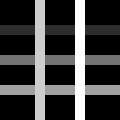

In [ ]:
#NumPy 배열로 체크무늬 그레이(흑백) 스케일 이미지 생성
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = np.zeros((120,120), dtype=np.uint8)       # 120x120 2차원배열생성, 검은색혹백이미지
img[25:35, :] = 45                              # 25~35행모든열에 45할당
img[55:65, :] =115                              # 55-65행모든 열에 115 할당
img[85:95, :] = 160                             # 85~95행모든 열에 160 할당
img[:, 35:45] = 205                             # 모든 행 35〜45 열에 205 할당
img[:, 75:85] = 255                             # 모든 행 75〜85열에 255할당
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

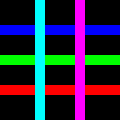

In [ ]:
#Numpy 배열로 체크무늬 BGR 스케일 이미지 생성
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = np.zeros((120,120, 3), dtype=np.uint8)
img[25:35, :] = [255,0,0]                         #25~35행 모든 열에 파란색 할당
img[55:65, :] = [0,255,0]                         #55~65행 모든 열에 초록색 할당
img[85:95, :] = [0,0,255]                         #85~95행 모든 열에 빨간색 할당
img[:, 35:45] = [255,255,0]                       #모든 행 35~45 열에 하늘색 할당
img[:, 75:85] = [255,0,255]                       #모든 행 75~85 열에 분홍색 할당
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 3.2 Matplotlib

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

### 3.2.2 plot 
그래프를 그리는 가장 간단한 방법은 plot() 함수를 사용하는 것이다. 1차원 배열을 인자로 전달하면 배열의 인덱스를 x 좌표로, 배열의 값을 y 좌표로 써서 그래프를 그린다. 아래 코드는 가장 간단한 방법으로 그래프를 그리는 예제이다.

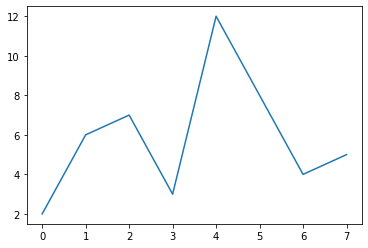

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([2,6,7,3,12,8,4,5])      #배열 생성
plt.plot(a)                           #plot 생성
plt.show()                            #plot 그리기

두 배열의 상관관계를 표시하려면 plot() 함수의 인자로 배열을 순차적으로 전달하면 된다. 그 예시는 다음과 같다.

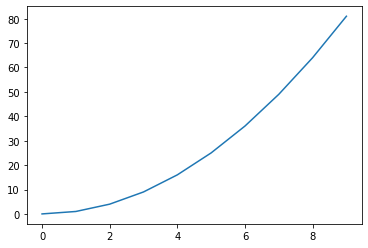

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)         #0,1,2,3,4,5,6,7,8,9
y = x**2                  #0,1,4,9,16,25,36,49,64,81
plt.plot(x,y)             #plot 생성
plt.show()                #plot 화면에 표시

### 3.2.3 color와 style
그래프 선에 색상과 스타일을 지정할 수 있다. plot()함수의 마지막 인자에 아래의 색상 기호 중 하나를 선택해서 문자로 전달하면 된다.
* 색상기호
  * b : 파란색
  * g : 초록색
  * r : 빨간색
  * c : 청록색
  * m : 자홍색
  * y : 노란색
  * k : 검은색
  * w : 흰색

다음 예제를 보자.

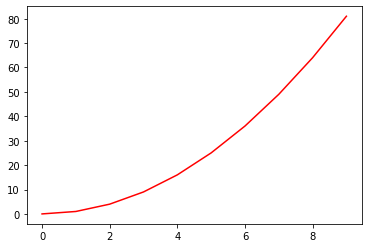

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)         #0,1,2,3,4,5,6,7,8,9
y = x**2                  #0,1,4,9,16,25,36,49,64,81
plt.plot(x,y, 'r')             #plot 생성
plt.show()                #plot 화면에 표시

색상과 함께 스타일도 지정할 수 있는데, 다음의 스타일 기호 중 하나를 색상 값에 이어 붙여서 사용한다.
* -(실선) : --(이음선
* -.(점 이음선) : :(점선)
* .(점) : ,(픽셀)
* o(원) : v(역삼각형)
* ^(정삼각형) : <(좌삼각형)
* \>(우삼각형) : 1(작은 역삼각형)
* 2(작은 정삼각형) : 3(작은 좌 삼각형)
* 4(작은 우삼각형) : s(사각형)
* p(오각형) : *(별표)
* h(육각형) : +(더하기 표)
* D(다이아몬드 표) : x(엑스 표)



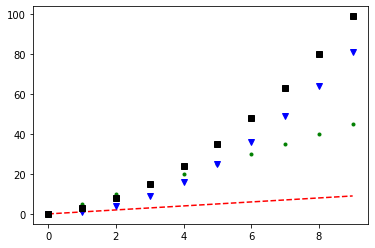

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10)         
f1 = x*5
f2 = x **2
f3 = x **2 + x*2

plt.plot(x,'r--')       #빨간색 이음선
plt.plot(f1, 'g.')      #초록색 점
plt.plot(f2, 'bv')      #파란색 역삼각형
plt.plot(f3, 'ks')      #검은색 사각형
plt.show()

### 3.2.4 subplot
바로 위에 그래프는 여러 배열 값을 하나의 다이어그램에 겹쳐서 그래프를 그렸다. 각각의 그래프를 분리해서 따로 그려야 할 때는 plt.subplot을 사용한다. 이 함수는 3개의 인자를 이용해서 몇 행 몇 열로 분할된 그래프에 몇 번째 그래프를 그릴지는 먼저 지정한 후에 plt.plot() 함수를 호출하면 그 자리에 그래프를 그리게 된다.

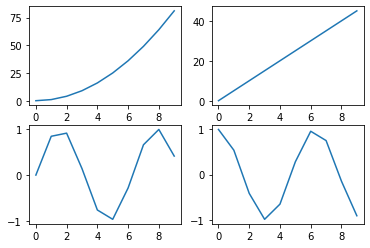

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(10) 
plt.subplot(2,2,1)      #2행 2열 중에 첫 번째
plt.plot(x,x**2)

plt.subplot(2,2,2)      #2행 2열 중에 두 번째
plt.plot(x, x*5)

plt.subplot(2,2,3)      #2행 2열 중에 세 번째
plt.plot(x, np.sin(x))

plt.subplot(224)        #2행 2열 중에 네 번째
plt.plot(x, np.cos(x))

plt.show()

subplot(2,2,1)처럼 3개의 인자를 전달하는 것과 subplot(221)처럼 세 자리 숫자 한개를 전달하는 것은 똑같이 작동한다.

### 3.2.5 이미지 표시
plt.plot() 대신에 plt.imshow() 함수를 호출하면 OpenCV로 읽어들인 이미지를 그래프 영역에 출력할 수 있다. 

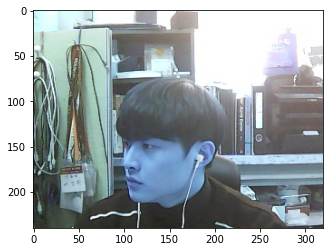

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/파이썬을 이용한 open CV/Data_Folder/Save_picture.jpg')

plt.imshow(img)     #이미지 표시
plt.show()

앞 예제의 실행 결과의 색상이 이상하다. 이유는 plt.imshow() 함수는 컬러 이미지를 R,G,B 순서로 해석하지만 OpenCV 이미지는 B,G,R 순으로 만들어져서 색상 위치가 반대로 변한다. 그래서 OpenCV로 읽은 이미지를 R, G, B 순으로 바꾸어서 전달해야 한다.

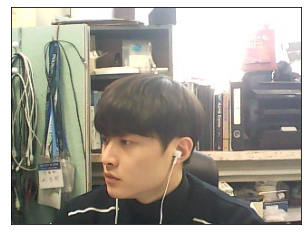

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/파이썬을 이용한 open CV/Data_Folder/Save_picture.jpg')

plt.imshow(img[:,:,::-1])     #이미지 컬러 채널 변경해서 표시
plt.xticks([])                #x좌표 눈금 제거
plt.yticks([])                #y좌표 눈금 제거
plt.show()

plt.imshow(img[:,:,::-1])는 컬러 채널의 순서를 바꾸는 것인데, 이 코드의 의미는 다음과 같다. 3차원 배열의 모든 내용을 선택하는 것은 img[:,:,:]이다. 이때 마지막 축의 길이가 3이므로 다시 img[:,:,::]으로 바꾸어 쓴다. 이때 마지막 축의 요소의 순서를 거꾸로 뒤집기 위해 img[:,:,::-1]로 쓴다. 쉬운 예로 다음을 볼 수 있다.  
img[:,:,(2,1,0)]  => img[:,:,(0,1,2)]
또는  
img[:,:,2], img[:,:,1], img[:,:,0] => img [:,:,0], img[:,:,1], img[:,:,2]    
  
앞서 설명한 대로 프로그램의 결과로 이미지를 여러 개 출력해야 하는 경우, OpenCV의 cv2.imshow() 함수는 여러 번 호출하면 매번 새로운 창이 열리기 때문에 귀찮다. plt.imshow() 함수는 plt.subplot 함수와 함께 사용하면 하나의 창에 여러개의 이미지를 동시에 출력할 수 있으니 이런 경우 좋은 대안이 될 수 있다.


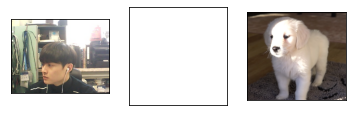

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img1 = cv2.imread('/content/drive/MyDrive/파이썬을 이용한 open CV/Data_Folder/Save_picture.jpg')
img2 = cv2.imread('/content/drive/MyDrive/파이썬을 이용한 open CV/Data_Folder/blank_500.jpg')
img3 = cv2.imread('/content/drive/MyDrive/파이썬을 이용한 open CV/Data_Folder/강아지 캡처.PNG')

plt.subplot(1,3,1)          #1행 3열 중에 첫 번째
plt.imshow(img1[:,:,(2,1,0)])
plt.xticks([]); plt.yticks([])

plt.subplot(1,3,2)          #1행 3열 중에 두 번째
plt.imshow(img2[:,:,::-1])
plt.xticks([]); plt.yticks([])

plt.subplot(1,3,3)          #1행 3열 중에 세 번째
plt.imshow(img3[:,:,::-1])
plt.xticks([]); plt.yticks([])

plt.show()